# NodeFinder

## Setup

In [1]:
%%capture
%%bash
pip install nodefinder

In [2]:
import tbmodels as tb
import nodefinder as nf
import lzma

In [3]:
with lzma.open('../04_z2pack/wte2_soc.tar.xz') as fin, open('../04_z2pack/wte2_soc.hdf5', 'wb') as fout:
    fout.write(fin.read())

## Find Weyl nodes in WTe<sub>2</sub> tight-binding model

First, we again load the tight-binding model of WTe<sub>2</sub> used in the Z2Pack example:

In [4]:
model = tb.io.load('../04_z2pack/wte2_soc.hdf5')

/home/greschd/.virtualenvs/tools_intro_clean/lib/python3.6/site-packages/h5py/_hl/dataset.py:313: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  "Use dataset[()] instead.", H5pyDeprecationWarning)


In [5]:
def gap_fct(k):
    ev = model.eigenval(k)
    return ev[model.occ] - ev[model.occ - 1]

In [7]:
nf.search.run_async?

In [9]:
result = nf.search.run(
    gap_fct=gap_fct,
    limits=[(0, 0.2), (0, 0.2), (-0.1, 0.1)],
    periodic=False,
    initial_mesh_size=2,
    refinement_stencil=None,
    feature_size=0.01,
    gap_threshold=1e-4
)

<IPython.core.display.Javascript object>


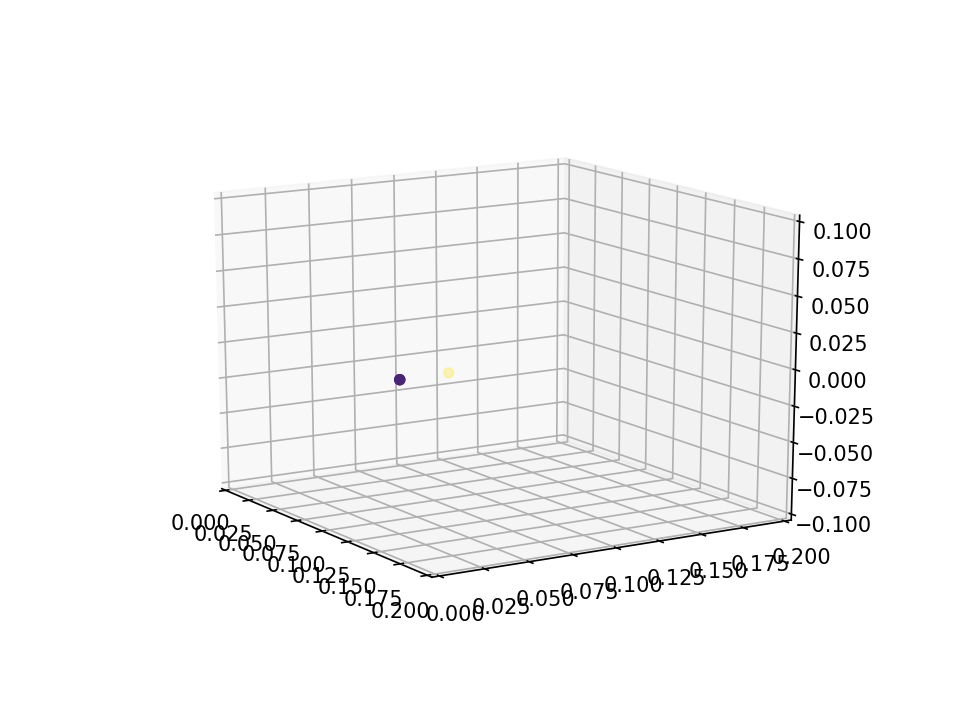

In [10]:
%matplotlib notebook
nf.search.plot.points(result);

In [11]:
res_identify = nf.identify.run(result)

/home/greschd/.virtualenvs/tools_intro_clean/lib/python3.6/site-packages/numpy/lib/function_base.py:392: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
/home/greschd/.virtualenvs/tools_intro_clean/lib/python3.6/site-packages/numpy/core/_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


<IPython.core.display.Javascript object>


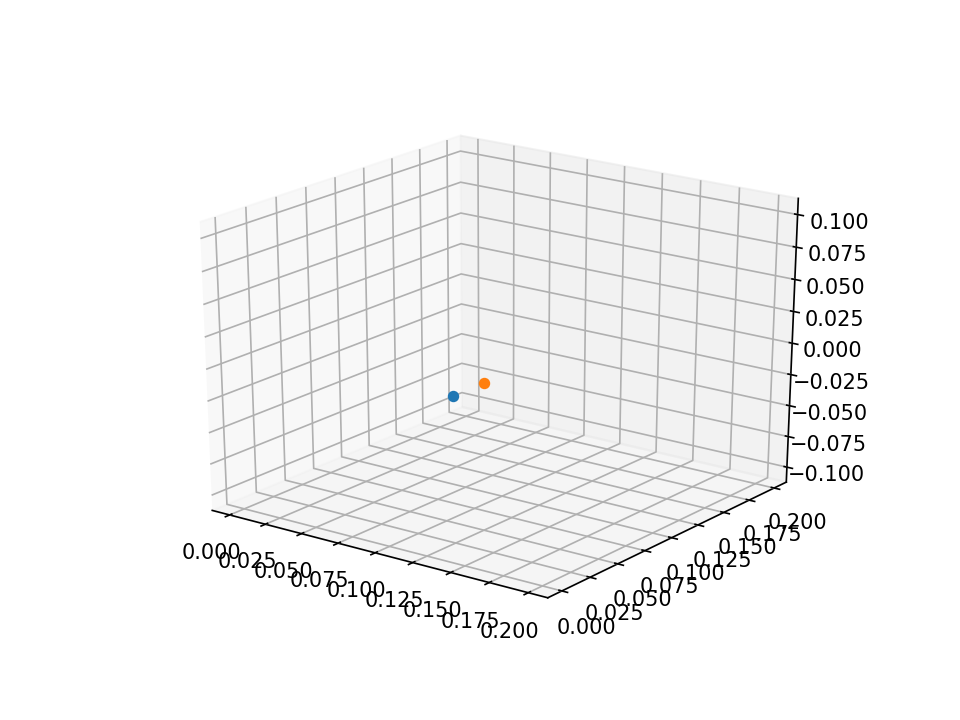

In [12]:
nf.identify.plot.result(res_identify);

## Toy Example: Nodal line

In [13]:
import numpy as np

In [14]:
def gap_func(coord):
    x, y, z = coord
    return np.abs(x**2 + y**2 - 0.7) + np.abs(z)

In [18]:
result = nf.search.run(
    gap_func,
    limits=[(-1, 1)] * 3,
    feature_size=0.1,
    gap_threshold=1e-4,
    initial_mesh_size=3, 
    refinement_stencil=nf.search.refinement_stencil.get_sphere_stencil(num_points=10),
    use_fake_potential=True,
)

<IPython.core.display.Javascript object>


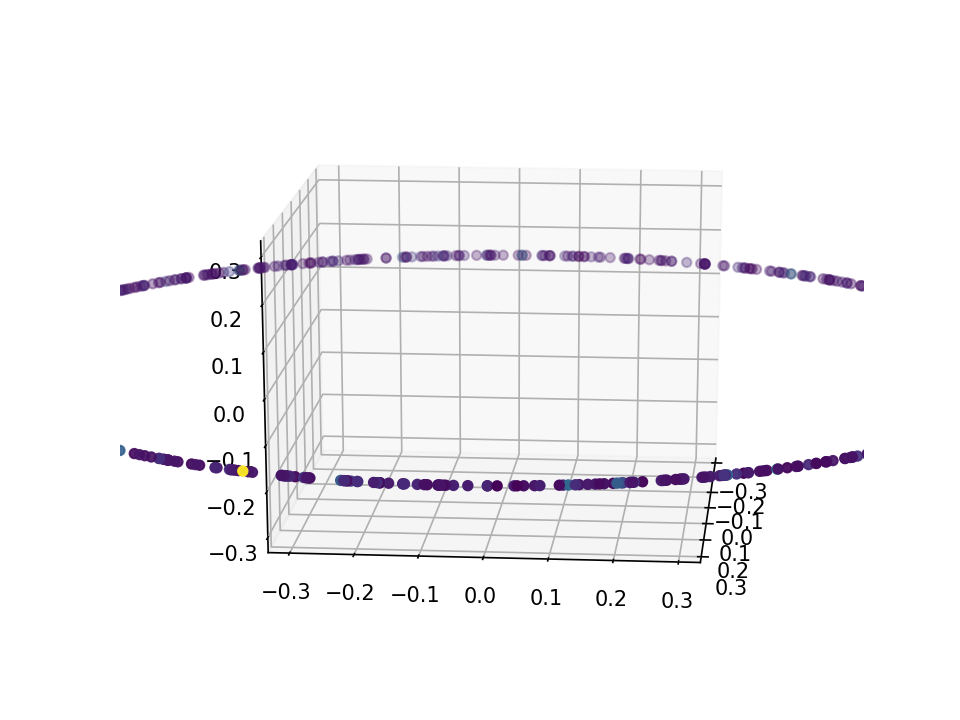

(<Figure size 640x480 with 1 Axes>,
 <matplotlib.axes._subplots.Axes3DSubplot at 0x7fb4eec8c550>)

In [19]:
nf.search.plot.points(result)

In [20]:
res_identify = nf.identify.run(result)

In [21]:
res_identify

IdentificationResultContainer(coordinate_system=CoordinateSystem(limits=array([[-1,  1],
       [-1,  1],
       [-1,  1]]), periodic=True), feature_size=0.1, results=[IdentificationResult(dimension=1, shape=NodalLine(graph=<625 nodes, 625 edges>, degree_count=Counter(), shape_name='CLOSED LOOP'), positions=<642 values>)])

<IPython.core.display.Javascript object>


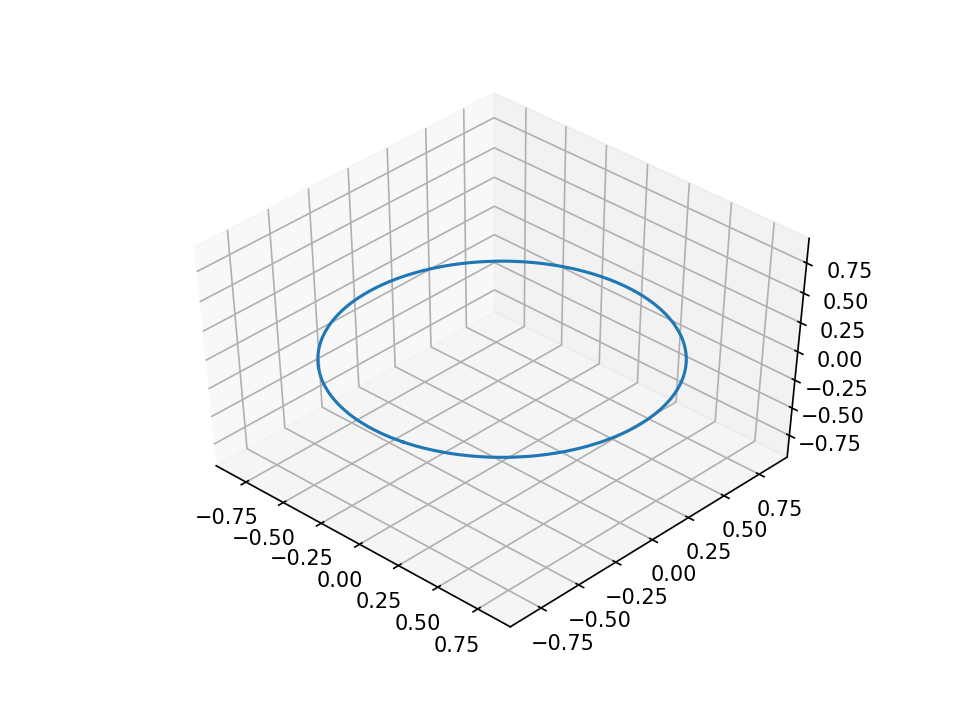

In [22]:
nf.identify.plot.result(res_identify);